In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

# Setting seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

liga1_player = pd.read_csv("player_data.csv")

# Split birth date and age data, and correcting the datatypes
liga1_player["birth_date"] = liga1_player["Date of birth / Age"].str[:-5]
liga1_player['birth_date'] = pd.to_datetime(liga1_player['birth_date'])
liga1_player["age"] = liga1_player["Date of birth / Age"].str[-3:-1]
liga1_player['age'] = pd.to_numeric(liga1_player['age'])

# Correcting height dataype and renaming the column
liga1_player["height"] = liga1_player["height"].replace(["-","-."], 0)
liga1_player["height"] = liga1_player["height"].str[:1] + "." + liga1_player["height"].str[2:4]
liga1_player["height"] = pd.to_numeric(liga1_player["height"])
liga1_player.rename(columns = {'height':'height_M'}, inplace = True)

# Correcting joined dataype
liga1_player["joined"] = liga1_player["joined"].replace("-",0)
liga1_player["joined"] = pd.to_datetime(liga1_player["joined"])

# Correcting market_value data and renaming the column
liga1_player["market_value"] = liga1_player["market_value"].replace("-", 0)
liga1_player["market_value"] = liga1_player["market_value"].str[1:-1]
liga1_player["market_value"] = pd.to_numeric(liga1_player["market_value"])
liga1_player["market_value"] = liga1_player["market_value"]*1000
liga1_player.rename(columns = {'market_value':'market_value_EUR'}, inplace = True)

# Drop unused column
liga1_player = liga1_player.drop(columns='Date of birth / Age')

# Correcting data in player position
liga1_player["position"] = liga1_player["position"].replace(["Centre Midfield", "Center Midfield"], "Central Midfield")
liga1_player["position"] = liga1_player["position"].replace("Goal Keeper", "Goalkeeper")
liga1_player["position"] = liga1_player["position"].replace("Center-Back","Centre-Back")

liga1_player["contract"] = liga1_player["contract"].replace("2024","31-Dec-24")
liga1_player["contract"] = liga1_player["contract"].replace("2025","31-Dec-25")
liga1_player["contract"] = liga1_player["contract"].replace("2026","31-Dec-26")
liga1_player["contract"] = liga1_player["contract"].replace("Dec, 2023","31-Dec-23")
liga1_player["contract"] = liga1_player["contract"].replace("-",np.nan)
liga1_player["contract"] = pd.to_datetime(liga1_player["contract"])

liga1_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   kit_number        568 non-null    object        
 1   player_name       568 non-null    object        
 2   position          568 non-null    object        
 3   nationality       568 non-null    object        
 4   height_M          531 non-null    float64       
 5   foot              522 non-null    object        
 6   joined            568 non-null    datetime64[ns]
 7   signed_from       564 non-null    object        
 8   contract          235 non-null    datetime64[ns]
 9   market_value_EUR  504 non-null    float64       
 10  club_name         568 non-null    object        
 11  birth_date        550 non-null    datetime64[ns]
 12  age               550 non-null    float64       
dtypes: datetime64[ns](3), float64(3), object(7)
memory usage: 57.8+ KB


### Market value distribution

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


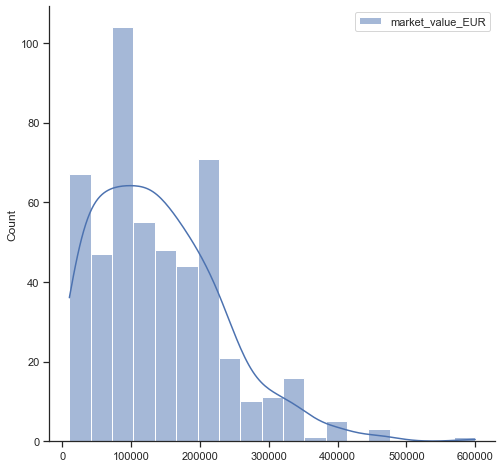

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(liga1_player[["market_value_EUR"]], kde=True)

### Market value Distribution from every club

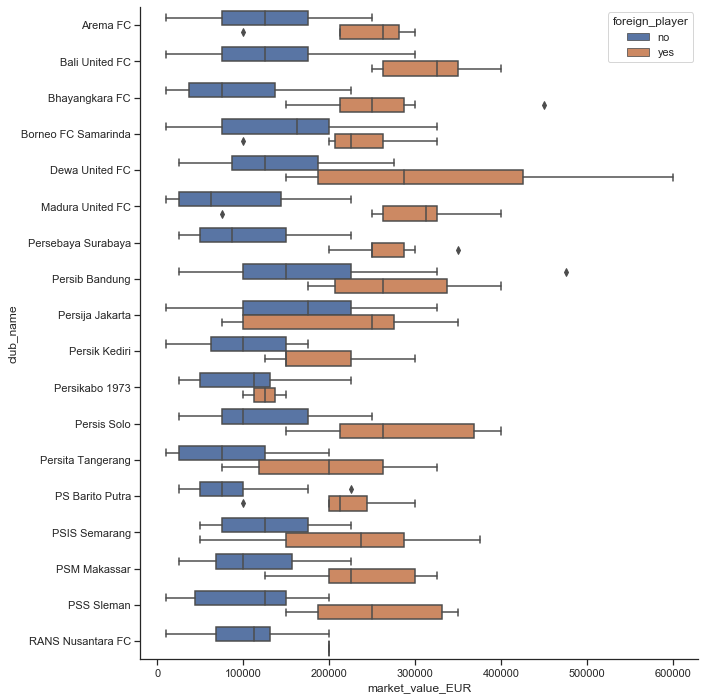

In [38]:
plt.figure(figsize=(10,12))
sns.boxplot(data=liga1_player, x="market_value_EUR", y="club_name", hue="foreign_player")

### Get sum of market_value of all player in the club

In [5]:
# Get sum of market_value of all player in the club
club_mv = liga1_player.groupby(by="club_name").sum().sort_values(by="market_value_EUR", ascending=False)[["market_value_EUR"]].reset_index()

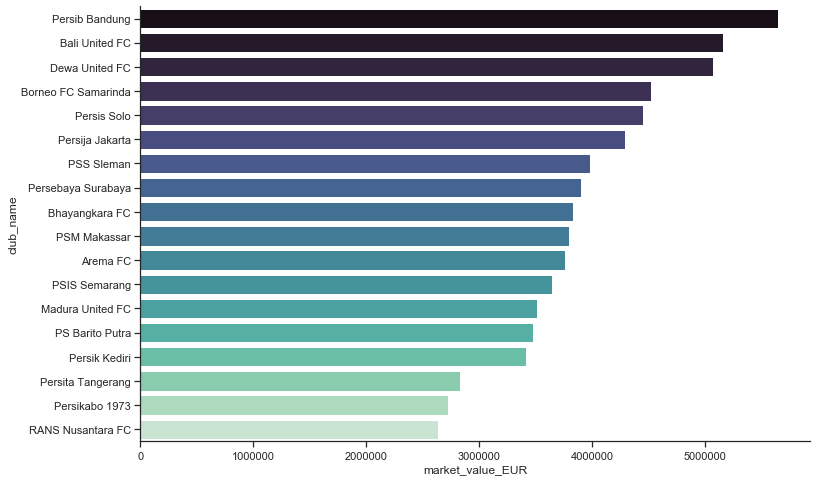

In [6]:
plt.figure(figsize=(12,8))
sns.barplot(data=club_mv, x="market_value_EUR", y="club_name", palette="mako")

### Player with highest market_values

In [29]:
liga1_player.sort_values(by="market_value_EUR", ascending=False)[:10][["player_name","market_value_EUR","nationality","club_name","age"]]

,player_name,market_value_EUR,nationality,club_name,age
146,Dimitrios Kolovos,600000.0,Greece,Dewa United FC,30.0
244,Marc Klok,475000.0,Indonesia,Persib Bandung,30.0
158,Sonny Stevens,450000.0,Netherlands,Dewa United FC,31.0
90,Matías Mier,450000.0,Uruguay,Bhayangkara FC,32.0
63,Jefferson,400000.0,Brazil,Bali United FC,28.0
227,Nick Kuipers,400000.0,Netherlands,Persib Bandung,30.0
354,Alexis Messidoro,400000.0,Argentina,Persis Solo,26.0
359,Roni,400000.0,Spain,Persis Solo,29.0
164,Hugo Gomes,400000.0,Brazil,Madura United FC,28.0
448,Taisei Marukawa,375000.0,Japan,PSIS Semarang,26.0


9 of 10 highest market value is foreign players, 
Even Marc Klok is a naturalized player from the Netherlands

In [8]:
# Player with highest market_values
liga1_player.sort_values(by="market_value_EUR", ascending=False)[:10][["club_name"]].value_counts()

club_name       
Dewa United FC      2
Persib Bandung      2
Persis Solo         2
Bali United FC      1
Bhayangkara FC      1
Madura United FC    1
PSIS Semarang       1
dtype: int64

### Market value's mean for player from every country

In [9]:
nas_mv = liga1_player.groupby(by="nationality").mean().sort_values(by="market_value_EUR", ascending=False).reset_index()

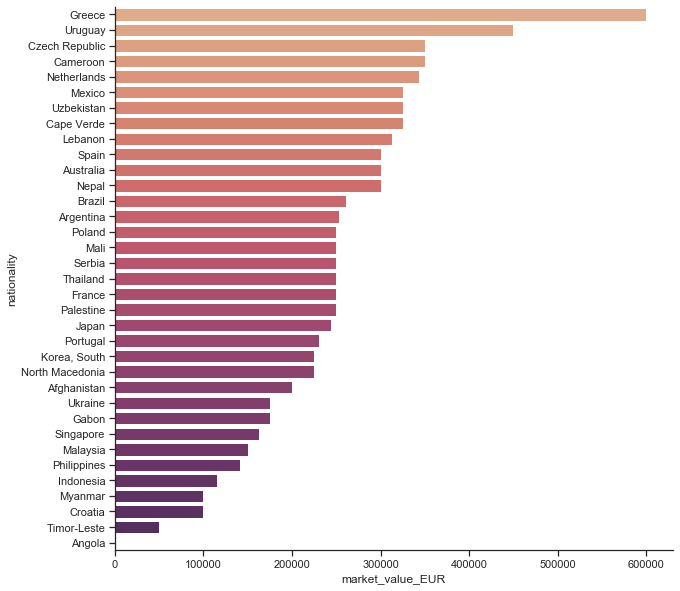

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(data=nas_mv, x="market_value_EUR", y="nationality", palette="flare")

### Player with highest market_values from every club

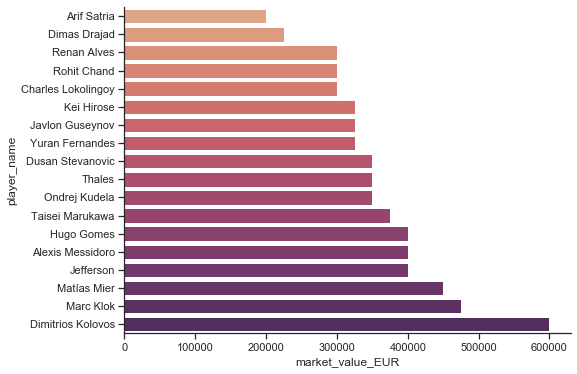

In [58]:
expensive_player = liga1_player.drop(liga1_player.index)
for club in liga1_player.club_name.unique():
    player = liga1_player[liga1_player["club_name"]==club].sort_values(by="market_value_EUR", ascending=False).iloc[[0]]
    expensive_player = pd.concat([expensive_player, player])

plt.figure(figsize=(8,6))
sns.barplot(data=expensive_player.sort_values(by="market_value_EUR"), x="market_value_EUR", y="player_name", palette="flare")

In [12]:
expensive_player["position"].value_counts()

Centre-Back           7
Central Midfield      4
Centre-Forward        3
Attacking Midfield    2
Left Midfield         1
Left Winger           1
Name: position, dtype: int64

In [13]:
expensive_player["nationality"].value_counts()

Brazil            4
Indonesia         3
Japan             2
Australia         1
Uruguay           1
Greece            1
Serbia            1
Czech Republic    1
Nepal             1
Argentina         1
Uzbekistan        1
Cape Verde        1
Name: nationality, dtype: int64

In [14]:
expensive_player["kit_number"].value_counts()

8     2
5     2
10    2
11    1
94    1
33    1
22    1
23    1
17    1
32    1
97    1
19    1
36    1
4     1
28    1
Name: kit_number, dtype: int64

### Market value mean based on the position

In [15]:
pos_mv = liga1_player.groupby("position").mean()[["market_value_EUR"]].sort_values(by="market_value_EUR", ascending=False).dropna().reset_index()

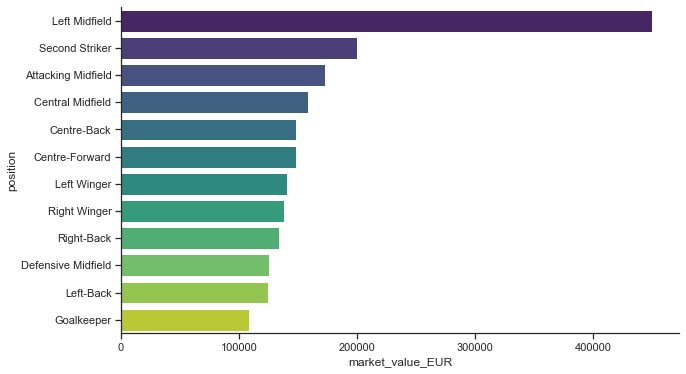

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=pos_mv, x="market_value_EUR", y="position", palette="viridis")

### Compared market value distribution on foreign player

In [17]:
liga1_player["foreign_player"] = liga1_player.apply(lambda x: "no" if x['nationality'] == "Indonesia" else "yes", axis=1)

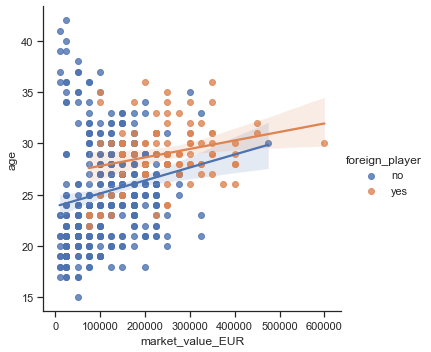

In [18]:
sns.lmplot(data=liga1_player, x='market_value_EUR', y="age", hue="foreign_player")

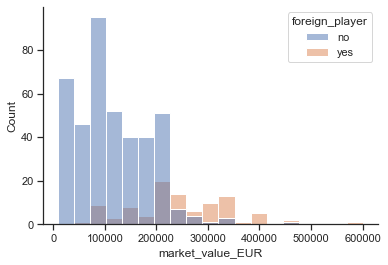

In [19]:
sns.histplot(data=liga1_player, x="market_value_EUR", hue="foreign_player")

In [20]:
liga1_player.position.value_counts()

Centre-Back           93
Goalkeeper            72
Centre-Forward        65
Defensive Midfield    62
Attacking Midfield    61
Right Winger          51
Right-Back            45
Left-Back             41
Central Midfield      34
Left Winger           34
Midfield               4
Attack                 2
Second Striker         2
Left Midfield          1
Defence                1
Name: position, dtype: int64

In [32]:
liga1_player[liga1_player.player_name.str.contains(pat = 'Evan')]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,foreign_player
5,9,Evan Dimas,Central Midfield,Indonesia,1.67,both,2022-04-01,Bhayangkara FC,NaT,250000.0,Arema FC,1995-03-13,28.0,no
544,10,Evandro Brandão,Second Striker,Angola,1.81,right,2023-07-01,FC Alverca,NaT,NaN,RANS Nusantara FC,1991-05-07,32.0,yes


In [47]:
liga1_player[liga1_player.club_name == "RANS Nusantara FC"]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,foreign_player
538,2,Muhammad Syukron,Centre-Back,Indonesia,1.83,right,2023-07-01,Persipa Pati,NaT,25000.0,RANS Nusantara FC,1997-02-24,26.0,no
539,3,Ângelo,Centre-Back,Portugal,1.89,right,2023-07-01,SC Covilhã,NaT,200000.0,RANS Nusantara FC,1993-07-03,30.0,yes
540,5,Dallen Doke,Right-Back,Indonesia,1.72,right,2023-07-01,PSM Makassar,NaT,100000.0,RANS Nusantara FC,1998-01-02,25.0,no
541,7,Tavinho,Right Winger,Portugal,1.81,right,2023-07-01,FC Alverca,NaT,NaN,RANS Nusantara FC,1993-09-04,29.0,yes
542,8,Antoni Nugroho,Right Winger,Indonesia,1.68,both,2023-07-01,Bhayangkara FC,NaT,125000.0,RANS Nusantara FC,1994-02-25,29.0,no
543,9,Kenshiro Daniels,Centre-Forward,Philippines,1.77,right,2023-07-01,Sukhothai FC,NaT,200000.0,RANS Nusantara FC,1995-01-13,28.0,yes
544,10,Evandro Brandão,Second Striker,Angola,1.81,right,2023-07-01,FC Alverca,NaT,NaN,RANS Nusantara FC,1991-05-07,32.0,yes
545,11,Abdul Rahman,Attack,Indonesia,NaN,NaN,2023-07-01,Serpong City FC,NaT,NaN,RANS Nusantara FC,2002-08-01,20.0,no
546,13,Samsul Arifin,Left-Back,Indonesia,1.63,left,2023-07-01,Bhayangkara FC,NaT,75000.0,RANS Nusantara FC,1992-01-03,31.0,no
547,17,Paulo Sitanggang,Central Midfield,Indonesia,1.68,right,2023-07-01,Borneo FC Samarinda,NaT,150000.0,RANS Nusantara FC,1995-10-17,27.0,no


In [43]:
liga1_player.groupby(by=["club_name"]).count()

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,birth_date,age,foreign_player
club_name,,,,,,,,,,,,,
Arema FC,32,32,32,32,31,30,32,32,5,27,31,31,32
Bali United FC,32,32,32,32,32,29,32,32,10,31,31,31,32
Bhayangkara FC,35,35,35,35,33,34,35,35,3,29,33,33,35
Borneo FC Samarinda,30,30,30,30,30,28,30,29,28,28,30,30,30
Dewa United FC,31,31,31,31,30,31,31,31,17,29,30,30,31
Madura United FC,33,33,33,33,29,28,33,33,18,28,29,29,33
PS Barito Putra,33,33,33,33,31,31,33,33,15,33,33,33,33
PSIS Semarang,29,29,29,29,26,26,29,29,8,23,28,28,29
PSM Makassar,32,32,32,32,30,29,32,32,26,29,31,31,32
